In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [339]:
sns.set(style="whitegrid", color_codes=True)
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3 * cm.max() / 4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [340]:
df = pd.read_csv("data/parkinsons_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


In [341]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [343]:
df.drop(columns="DoctorInCharge", axis=1, inplace=True)

In [344]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

In [345]:
df.skew()

PatientID                   0.000000
Age                        -0.033460
Gender                      0.029478
Ethnicity                   1.244965
EducationLevel              0.163214
BMI                         0.035171
Smoking                     0.892115
AlcoholConsumption         -0.019206
PhysicalActivity            0.025594
DietQuality                 0.034928
SleepQuality                0.008514
FamilyHistoryParkinsons     2.008275
TraumaticBrainInjury        2.554546
Hypertension                2.008275
Diabetes                    1.981515
Depression                  1.460803
Stroke                      4.184889
SystolicBP                  0.028523
DiastolicBP                -0.057021
CholesterolTotal           -0.050801
CholesterolLDL             -0.017991
CholesterolHDL              0.001855
CholesterolTriglycerides    0.017058
UPDRS                      -0.048271
MoCA                       -0.023930
FunctionalAssessment        0.011272
Tremor                      0.275451
R

In [346]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1)
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,6.458713,29.181289,1.572427,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,37.306703,12.332639,4.787551,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,67.838170,29.927783,2.130686,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,52.964696,21.304268,3.391288,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,21.804880,8.336364,3.200969,0,0,0,1,0,1,0


In [347]:
Y = df['Diagnosis']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Diagnosis, dtype: int64

In [348]:
Y.value_counts(normalize=True)

Diagnosis
1    0.619477
0    0.380523
Name: proportion, dtype: float64

In [349]:
# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y)

# # print the shape of train and test data
# print("X_train shape: ", X_train.shape)
# print("y_train shape: ", y_train.shape)
# print("X_test shape: ", X_test.shape)
# print("y_test shape: ", y_test.shape)

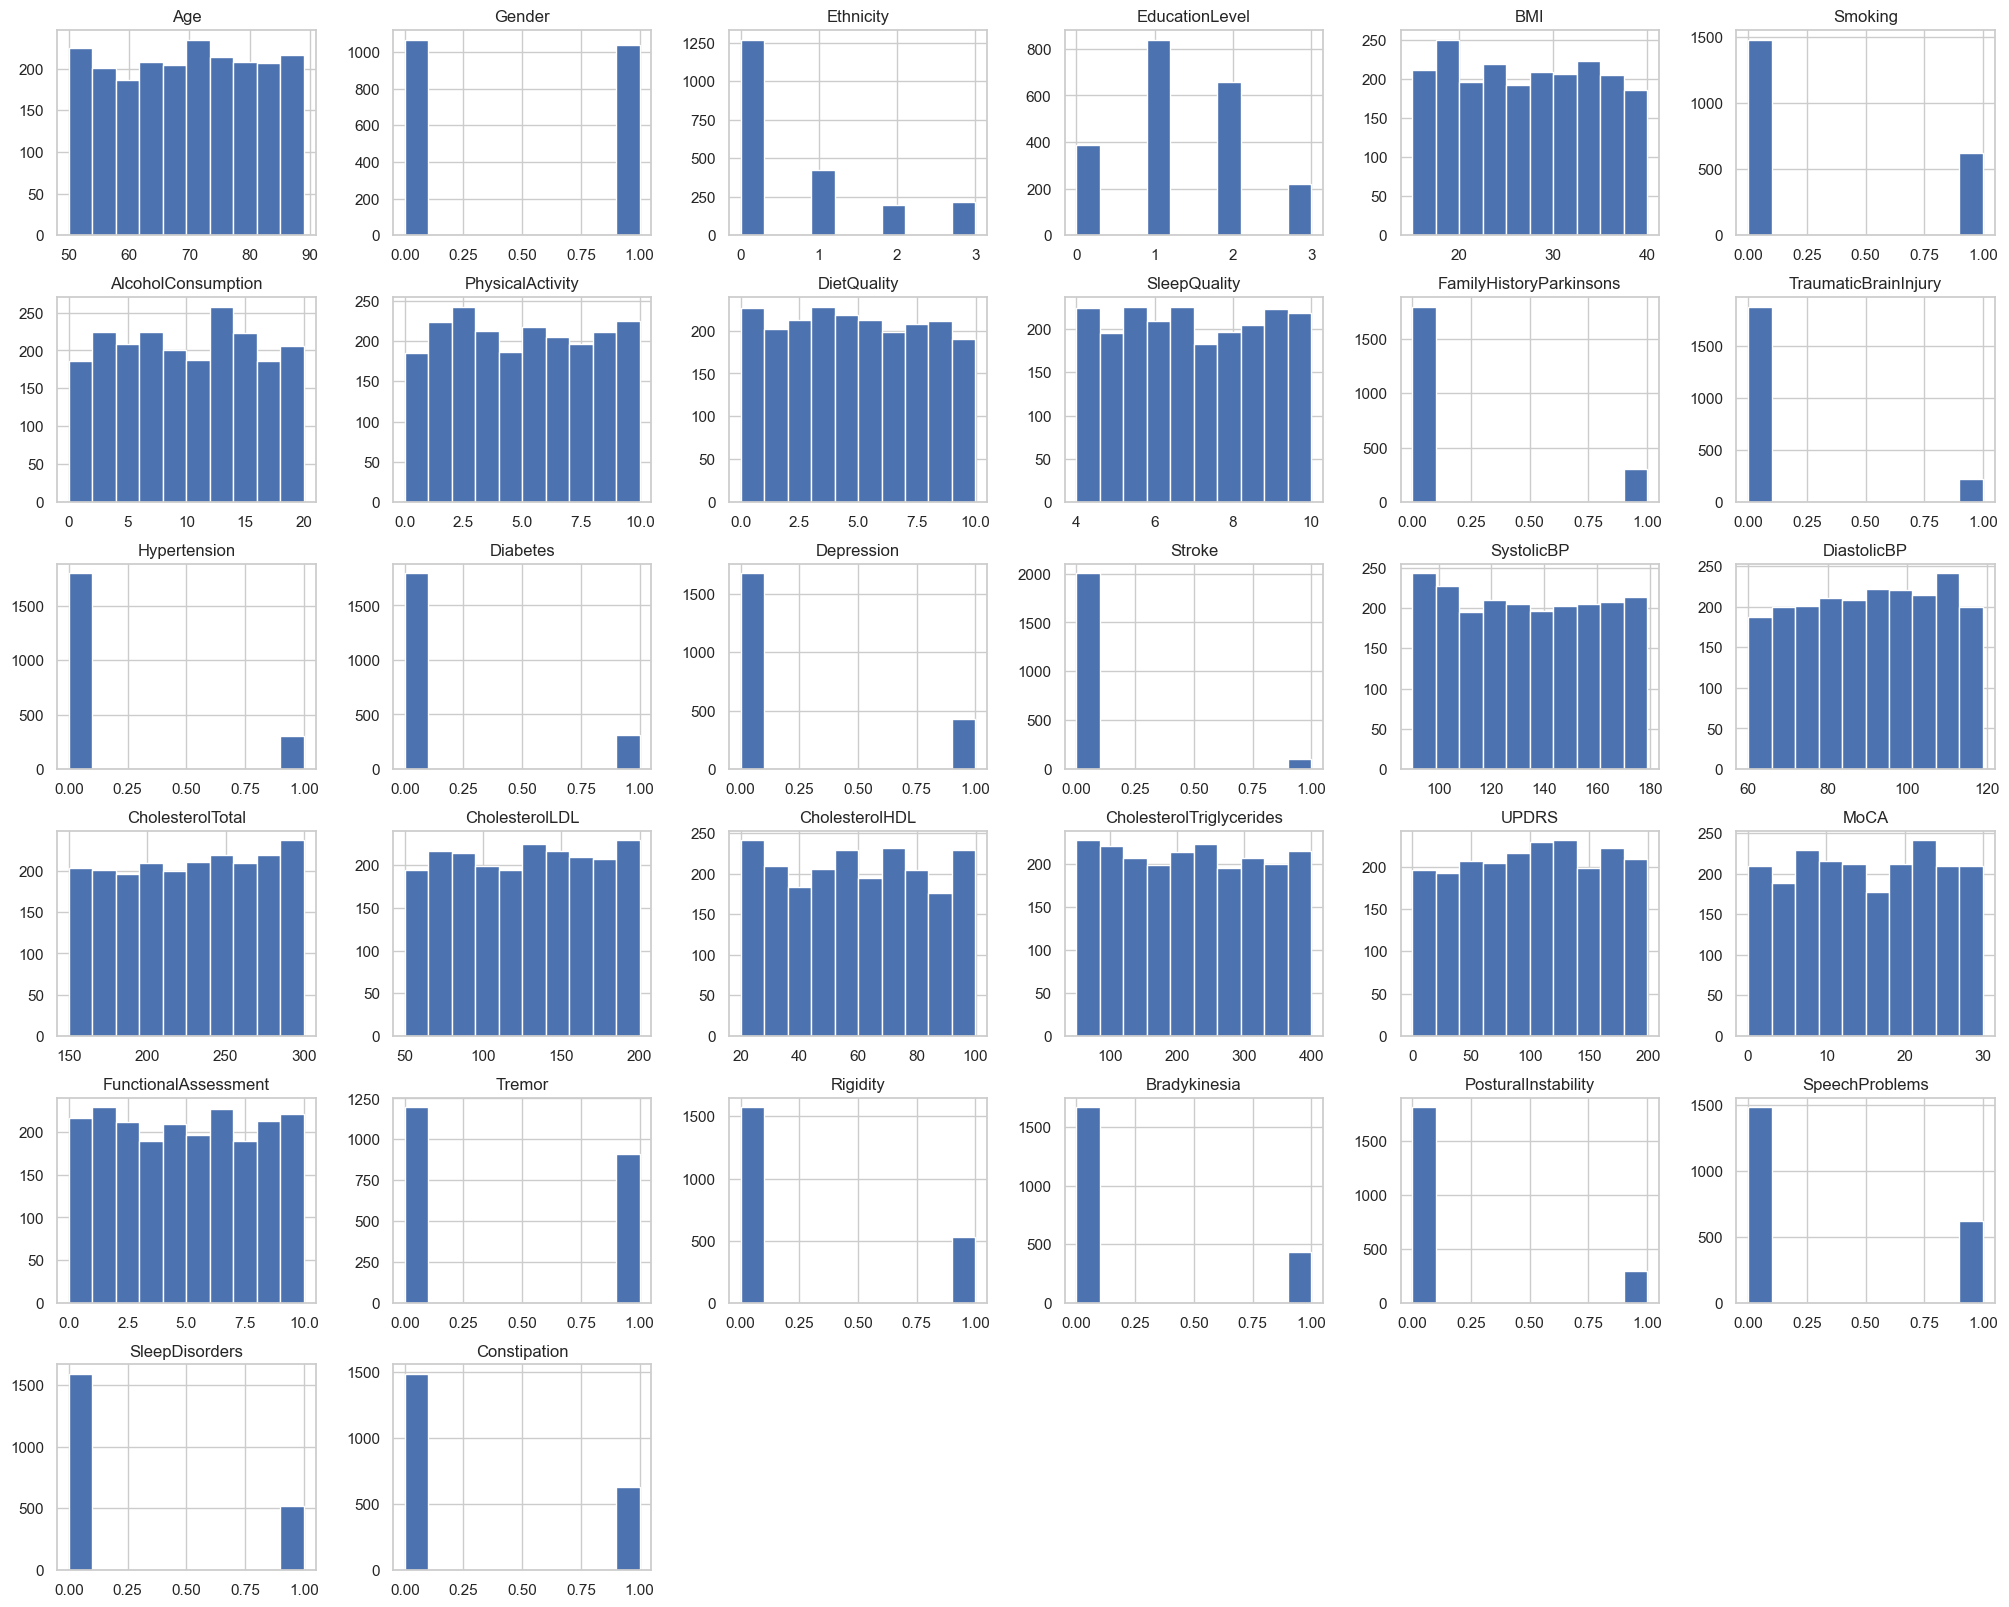

In [350]:
X.hist(figsize=(25, 20))
plt.show()

# K-Means

In [351]:
# Assuming df is your original dataframe
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [352]:
# Preprocessing
le = LabelEncoder()
y = le.fit_transform(y)

ms = MinMaxScaler()
X_scaled = ms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [353]:
# Function to evaluate K-means
def kmeans_accuracy(n_cluster, X, y):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    labels = kmeans.fit_predict(X)
    correct_labels = sum(y == labels)
    accuracy = correct_labels / float(y.size)
    print(f"k={n_cluster}")
    print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")
    print(f'Accuracy score: {accuracy:.2f}')
    print()
    return kmeans, accuracy

# Evaluate different K values
for k in range(1, 8):
    kmeans_accuracy(k, X_scaled, y)

k=1
Result: 801 out of 2105 samples were correctly labeled.
Accuracy score: 0.38

k=2
Result: 1296 out of 2105 samples were correctly labeled.
Accuracy score: 0.62

k=3
Result: 1017 out of 2105 samples were correctly labeled.
Accuracy score: 0.48

k=4
Result: 816 out of 2105 samples were correctly labeled.
Accuracy score: 0.39

k=5
Result: 563 out of 2105 samples were correctly labeled.
Accuracy score: 0.27

k=6
Result: 563 out of 2105 samples were correctly labeled.
Accuracy score: 0.27

k=7
Result: 438 out of 2105 samples were correctly labeled.
Accuracy score: 0.21



In [354]:
# Choose K=3 as per your observation
kmeans, _ = kmeans_accuracy(2, X_scaled, y)
cluster_labels = kmeans.labels_

k=2
Result: 1296 out of 2105 samples were correctly labeled.
Accuracy score: 0.62



In [355]:

# Select a specific cluster (e.g., cluster 1)
selected_cluster = 1
cluster_mask = (cluster_labels == selected_cluster)

X_selected = X_scaled[cluster_mask]
y_selected = y[cluster_mask]

In [356]:
# Split the selected cluster data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Membuat range nilai n yang akan dicoba
param_grid = {'n_neighbors': range(1, 31)}

In [357]:
# Inisialisasi model KNN
knn = KNeighborsClassifier()

In [358]:
# Melakukan Grid Search dengan 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [359]:
# Mendapatkan n terbaik
best_n = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best n_neighbors: 13
Best cross-validation score: 0.8005


In [360]:
# Mengevaluasi model dengan n terbaik pada data test
best_knn = KNeighborsClassifier(n_neighbors=best_n)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best n: {test_accuracy:.4f}")

Test accuracy with best n: 0.7967


In [361]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [362]:
# Elbow Method
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

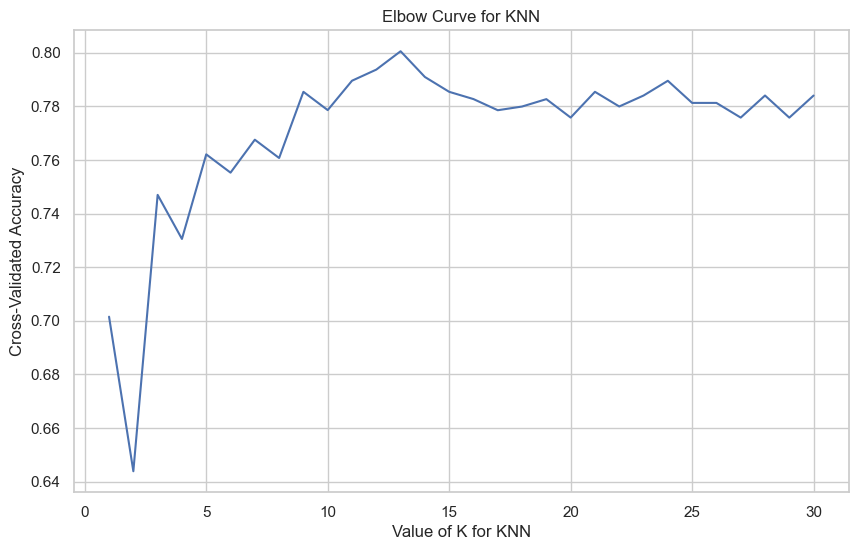

In [363]:
# Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Elbow Curve for KNN')
plt.show()

# Predict Sample data

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Asumsikan best_knn adalah model KNN terbaik yang sudah dilatih
# dan ms adalah MinMaxScaler yang sudah di-fit pada data training

def predict_sample(sample_data, model, scaler):
    """
    Memprediksi klasifikasi untuk sampel data baru.
    
    :param sample_data: List atau array berisi fitur-fitur sampel
    :param model: Model KNN yang sudah dilatih
    :param scaler: MinMaxScaler yang sudah di-fit pada data training
    :return: Prediksi kelas dan probabilitas
    """
    # Ubah sampel menjadi array 2D
    sample = np.array(sample_data).reshape(1, -1)
    
    # Normalisasi sampel menggunakan scaler yang sama dengan data training
    sample_scaled = scaler.transform(sample)
    
    # Prediksi kelas
    prediction = model.predict(sample_scaled)
    
    # Prediksi probabilitas (opsional, hanya jika Anda ingin melihat probabilitas untuk setiap kelas)
    probabilities = model.predict_proba(sample_scaled)
    
    return prediction[0], probabilities[0]

# Contoh penggunaan
# Asumsikan kita memiliki 8 fitur dalam dataset
sample_data = [1.5, 2.3, 0.9, 1.1, 0.8, 1.7, 2.0, 1.2]

prediction, probabilities = predict_sample(sample_data, best_knn, ms)

print(f"Prediksi kelas: {prediction}")
print(f"Probabilitas: {probabilities}")

# Jika Anda ingin menampilkan nama kelas (misalnya 'Parkinson' atau 'Non-Parkinson')
class_names = ['Non-Parkinson', 'Parkinson']  # Sesuaikan dengan label encoder Anda
print(f"Prediksi: {class_names[prediction]}")